## The Survey of Scottish Witchcraft Data Analysis

Our main theme as a group is : “The Ritual Objects used by Accused Witches’ in relationship with Religious Motifs and the Witches’ Meeting place."
Our Witchcraft Survey Data has been split into 5, giving each member of our team two data sets to work with.
The aim is for each of us to individually inquire the chosen data set by categorizing it and finding out unusual things.
The plan is to then connect all our findings together and build a cohesive narrative.
I am personally starting off by looking into the Ritual Objects and Religious Motifs data sets on their own and then combining them together to create relationships, see my analysis below:

In [44]:
# Our data came in Microsoft ACCCESS format, which we then exported to CSV to be able to work with in Python.
import pandas as pd
import numpy as np

In [45]:
# Reading in the datasets and analysing them individually to start with.
ritual_objects = pd.read_csv("WDB_RitualObject.csv")
ritual_objects.head()

,RitualObjectRef,RitualObjectSystemId,RitualObjectID,CaseRef,RitualObject_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon,Lastupdatedby1,Lastupdatedon1
0,RO/JO/1,JO,1,C/JO/2632,Yarn,jhm,17/05/2001,jhm,13/11/2002,NaN,NaN
1,RO/JO/2,JO,2,C/JO/2632,Egg,jhm,17/05/2001,jhm,13/11/2002,NaN,NaN
2,RO/JO/3,JO,3,C/JO/2632,Meal,jhm,17/05/2001,jhm,13/11/2002,NaN,NaN
3,RO/JO/316,JO,316,C/EGD/2453,Water,jhm,24/10/2001,jhm,24/10/2001,NaN,NaN
4,RO/JO/317,JO,317,C/EGD/142,Elfshot,jhm,06/11/2001,jhm,28/02/2002,NaN,NaN


For this part of my analysis, I will only be looking into column "RitualObject_Type".
The rest of the columns are not needed at this stage and "CaseRef" column is used in order to help make connections between this "Ritual objects" data set and other ones such as "Religious Motifs" table.

In [46]:
# Figuring out all the data types in the data frame
ritual_objects.dtypes
# We are working with tabular data

RitualObjectRef          object
RitualObjectSystemId     object
RitualObjectID            int64
CaseRef                  object
RitualObject_Type        object
Createdby                object
Createdate               object
Lastupdatedby            object
Lastupdatedon            object
Lastupdatedby1          float64
Lastupdatedon1          float64
dtype: object

In [47]:
# Figuring out the total number of rows in order to understand the size of our dataframe
index = ritual_objects.index
print(index)

RangeIndex(start=0, stop=632, step=1)


In [48]:
# Figuring out the total number of columns
len(ritual_objects.columns)

11

In [49]:
ritual_objects.CaseRef.nunique()

222

In [50]:
ritual_objects.RitualObject_Type.nunique()

128

In [51]:
# Similarly, we can also use shape function for the number of rows
ritual_objects.shape[0]

632

In [52]:
# Checking for missing data in the "RitualObject_Type" column using bool series
bool_series = pd.isnull(ritual_objects["RitualObject_Type"])
ritual_objects[bool_series]
# The following output shows all rows are filled with data, we don't have missing data and we can continue our analysis

,RitualObjectRef,RitualObjectSystemId,RitualObjectID,CaseRef,RitualObject_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon,Lastupdatedby1,Lastupdatedon1


In [53]:
# Finding out the number of unique values in column "RitualObject_Type" to understand the dataframe better
for col in ritual_objects[['RitualObject_Type']]:
    ritual_objects[col] = ritual_objects[col].str.strip()
    print('Number of unique values in' + str(col) +':' + str(ritual_objects[col].nunique()))
# There are 128 unique Ritual Objects

Number of unique values inRitualObject_Type:128


In [54]:
# Sorting out unique ritual objects in order to see what we are working with
unique_ritualobjects = ritual_objects['RitualObject_Type'].unique().tolist()
sorted(unique_ritualobjects)[:128]

['Ale',
 'Almond',
 'Amulet',
 'Animal dung',
 'Aqua Vitae',
 'Ash',
 'Axe',
 'Bannock',
 'Baton',
 'Bead',
 'Beetle',
 'Belt',
 'Bird (dead)',
 'Blood (animal)',
 'Bone',
 'Book',
 'Bowl',
 'Branch',
 'Bread',
 'Bridle/collar',
 'Butter',
 'Caird',
 'Camomile',
 'Cat',
 'Cheese',
 'Clay',
 'Cloth',
 'Clothing',
 'Coal',
 'Cockerel',
 'Coin',
 'Corn',
 'Corpse',
 'Corpse powder',
 'Crook',
 'Curch',
 'Dog',
 'Drink',
 'Earth',
 'Egg',
 'Elfshot',
 'Feathers',
 'Fire',
 'Flask of Water',
 'Flesh',
 'Foxtree Leaves',
 'Frog',
 'Garland',
 'Garlic',
 'Glass',
 'Grain',
 'Grass',
 'Grave earth',
 'Hair',
 'Hairbelt',
 'Hand (dead)',
 'Hen',
 'Herb',
 'Hook',
 'Horseshoe',
 'Iron',
 'Iron (hot)',
 'Jewel',
 'Knife',
 'Lead',
 'Leather Strap',
 'Lee Penny',
 'Liver',
 'Meal',
 'Metal',
 'Milk',
 "Mole's feet",
 'Money',
 'Nail',
 'Nail trimmings',
 'Nettle',
 'Oil',
 'Onion',
 'Paper',
 'Pillows',
 'Pin',
 'Plant',
 'Plough',
 'Pot',
 'Potions',
 'Pottage',
 'Powder',
 'Ribbon',
 'Ring',
 'R

In [55]:
# Finding the most common values used in RitualObject_Type column
ritual_objects.RitualObject_Type.value_counts()
# The most common Ritual Object used is water, followed by Wax/clay images and Stones

Water              60
Wax/clay images    47
Stones             33
Hair               28
Herb               26
                   ..
Grass               1
Snail               1
Sand                1
Flask of Water      1
Wine                1
Name: RitualObject_Type, Length: 128, dtype: int64

In [56]:
ritual_objects.groupby('RitualObject_Type').size()

RitualObject_Type
Ale            1
Almond         1
Amulet         1
Animal dung    1
Aqua Vitae     3
              ..
Wheat          4
Wine           1
Wood           1
Wort           1
Yarn           5
Length: 128, dtype: int64

In [57]:
# Print all ritual objects only used once (least common) from the RitualObject_Type Column
ro_usedonce = ritual_objects[ritual_objects.groupby('RitualObject_Type').RitualObject_Type.transform(len) == 1]
ro_usedonce
# There are 61 least common Ritual Objects that have only been used once

,RitualObjectRef,RitualObjectSystemId,RitualObjectID,CaseRef,RitualObject_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon,Lastupdatedby1,Lastupdatedon1
10,RO/JO/327,JO,327,C/EGD/2231,Wayburn leaf,jhm,23/11/2001,jhm,23/11/2001,NaN,NaN
11,RO/JO/328,JO,328,C/EGD/2471,Axe,jhm,23/11/2001,jhm,13/11/2002,NaN,NaN
14,RO/JO/338,JO,338,C/EGD/1906,Bead,jhm,04/12/2001,jhm,04/12/2001,NaN,NaN
29,RO/JO/427,JO,427,C/EGD/745,Money,jhm,07/03/2002,jhm,07/03/2002,NaN,NaN
45,RO/JO/444,JO,444,C/JO/3012,Tobacco,jhm,17/04/2002,jhm,17/04/2002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
587,RO/LA/633,LA,633,C/EGD/1558,Liver,LEM,22/08/2002,LEM,22/08/2002,NaN,NaN
593,RO/LA/657,LA,657,C/LA/2638,Caird,LEM,29/10/2002,LEM,29/10/2002,NaN,NaN
625,RO/LA/85,LA,85,C/EGD/136,Garland,LEM,25/09/2001,LEM,25/09/2001,NaN,NaN
628,RO/LA/88,LA,88,C/EGD/140,Hairbelt,LEM,25/09/2001,LEM,25/09/2001,NaN,NaN


In [58]:
# Picking out strange Ritual Objects and seeing how many times they appear, such as "Blood"
ritual_objects[ritual_objects.RitualObject_Type.str.contains('Blood', case=False)]

,RitualObjectRef,RitualObjectSystemId,RitualObjectID,CaseRef,RitualObject_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon,Lastupdatedby1,Lastupdatedon1
60,RO/JO/458,JO,458,C/EGD/2172,Blood (animal),jhm,09/05/2002,jhm,09/05/2002,NaN,NaN
226,RO/JO/72,JO,72,C/JO/2881,Blood (animal),jhm,06/09/2001,jhm,06/09/2001,NaN,NaN
252,RO/LA/127,LA,127,C/EGD/133,Blood (animal),LEM,03/10/2001,LEM,03/10/2001,NaN,NaN
326,RO/LA/293,LA,293,C/EGD/104,Blood (animal),LEM,16/10/2001,LEM,16/10/2001,NaN,NaN
372,RO/LA/343,LA,343,C/EGD/1778,Blood (animal),LEM,31/01/2002,LEM,31/01/2002,NaN,NaN
375,RO/LA/346,LA,346,C/EGD/1774,Blood (animal),LEM,31/01/2002,LEM,31/01/2002,NaN,NaN
378,RO/LA/349,LA,349,C/EGD/1773,Blood (animal),LEM,31/01/2002,LEM,31/01/2002,NaN,NaN
384,RO/LA/354,LA,354,C/LA/2959,Blood (animal),LEM,31/01/2002,LEM,31/01/2002,NaN,NaN
388,RO/LA/358,LA,358,C/EGD/1781,Blood (animal),LEM,31/01/2002,LEM,31/01/2002,NaN,NaN
391,RO/LA/360,LA,360,C/EGD/1780,Blood (animal),LEM,31/01/2002,LEM,31/01/2002,NaN,NaN


In [59]:
len(ritual_objects[ritual_objects['RitualObject_Type'].str.contains('Blood')])
# "Blood (animal)" appears 24 times

24

Similar to what has been done with the dataset above, I will import the "Religious Motif" dataset and analyse it on its own.
After that, I will create a new table with the merged datasets, in which I will start making connections, sorting and linking them together by using the CaseRef column present in both tables.

In [60]:
religious_motifs = pd.read_csv("WDB_ReligiousMotif.csv")
religious_motifs.head()

,MotifRef,MotifSystemId,MotifID,CaseRef,Motif_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,RM/JO/10,JO,10,C/JO/2882,Pilgrimage,jhm,07/09/2001,jhm,07/09/2001
1,RM/JO/102,JO,102,C/EGD/935,Trinity,jhm,21/08/2002,jhm,21/08/2002
2,RM/JO/104,JO,104,C/EGD/1533,Three,jhm,27/08/2002,jhm,27/08/2002
3,RM/JO/105,JO,105,C/JO/3248,Three,jhm,28/08/2002,jhm,28/08/2002
4,RM/JO/106,JO,106,C/EGD/1558,Three,jhm,08/10/2002,jhm,08/10/2002


In [61]:
# We can also use shape function to figure out the number of rows in the table
religious_motifs.shape[0]

128

In [62]:
# Figuring out the total number of columns
len(religious_motifs.columns)

9

In [64]:
religious_motifs.CaseRef.nunique()

80

In [18]:
# Checking for missing data in the "Motif_Type" column using bool series
bool_series2 = pd.isnull(religious_motifs["Motif_Type"])
religious_motifs[bool_series2]
# The following output shows all rows are filled with data, we don't have missing data

,MotifRef,MotifSystemId,MotifID,CaseRef,Motif_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon


In [19]:
# Finding out the number of unique values in column "Motif_Type"
for col in religious_motifs[['Motif_Type']]:
    religious_motifs[col] = religious_motifs[col].str.strip()
    print('Number of unique values in' + str(col) +':' + str(religious_motifs[col].nunique()))
# There are 17 unique Religious Motifs

Number of unique values inMotif_Type:17


In [20]:
# Sorting out unique Religious Motifs
unique_relmotifs = religious_motifs['Motif_Type'].unique().tolist()
sorted(unique_relmotifs)[:17]

['Angels',
 'Baptising animals',
 'Baptism Imagery',
 'Bible',
 'Cross',
 'Eschatology',
 'Flask of Water',
 'Holy water',
 'Holy well',
 'Nine',
 'Pilgrimage',
 'Prayer',
 'Saints',
 'Sign of the cross',
 'Six',
 'Three',
 'Trinity']

In [21]:
# Finding out the amount of times each of the unique Religious Motifs in Motif_Type column were used
religious_motifs.Motif_Type.value_counts()
# The most common Religious Motif used is Three, followed by Prayer, Nine, Trinity.

Three                39
Prayer               34
Nine                 18
Trinity              12
Holy well             6
Saints                4
Eschatology           3
Pilgrimage            2
Cross                 2
Holy water            1
Six                   1
Sign of the cross     1
Baptising animals     1
Bible                 1
Baptism Imagery       1
Angels                1
Flask of Water        1
Name: Motif_Type, dtype: int64

In [22]:
ritual_objects.RitualObject_Type.mode() # function mode shows most frequent value

0    Water
dtype: object

Based on the findings above, it is interesting to note that the most common Ritual Object is Water.
In contrast, the least common Religious Motif is Flask of Water, which you would assume would be more frequent based on the Ritual Object results.

In [23]:
# Next, I will use the CaseRef column (common column for both tables) to merge the two dataframes and create connections.
religious_motifs.CaseRef.nunique()
# There are 80 unique CaseRef in the Religious Motifs dataset

80

In [24]:
ritual_objects.CaseRef.nunique()
# There are 222 unique CaseRef in Ritual Objects dataset

222

It seems like some CaseRef values are missing from the Religious_Motifs table and therefore not all Ritual Objects and Religious Motifs will be able to be linked to each other.

In [25]:
# Merging the two dataframes based on CaseRef column.
objects_motifs = pd.merge(ritual_objects, religious_motifs)
objects_motifs.columns

Index(['RitualObjectRef', 'RitualObjectSystemId', 'RitualObjectID', 'CaseRef',
       'RitualObject_Type', 'Createdby', 'Createdate', 'Lastupdatedby',
       'Lastupdatedon', 'Lastupdatedby1', 'Lastupdatedon1', 'MotifRef',
       'MotifSystemId', 'MotifID', 'Motif_Type'],
      dtype='object')

In [26]:
objects_motifs.head()

,RitualObjectRef,RitualObjectSystemId,RitualObjectID,CaseRef,RitualObject_Type,Createdby,Createdate,Lastupdatedby,Lastupdatedon,Lastupdatedby1,Lastupdatedon1,MotifRef,MotifSystemId,MotifID,Motif_Type
0,RO/JO/327,JO,327,C/EGD/2231,Wayburn leaf,jhm,23/11/2001,jhm,23/11/2001,NaN,NaN,RM/JO/47,JO,47,Prayer
1,RO/JO/329,JO,329,C/EGD/1309,Tree,jhm,23/11/2001,jhm,23/11/2001,NaN,NaN,RM/JO/49,JO,49,Three
2,RO/JO/350,JO,350,C/EGD/1855,Water,jhm,07/02/2002,jhm,07/02/2002,NaN,NaN,RM/JO/51,JO,51,Prayer
3,RO/JO/450,JO,450,C/EGD/2150,Cloth,jhm,08/05/2002,jhm,08/05/2002,NaN,NaN,RM/JO/54,JO,54,Prayer
4,RO/JO/450,JO,450,C/EGD/2150,Cloth,jhm,08/05/2002,jhm,08/05/2002,NaN,NaN,RM/JO/55,JO,55,Three


In [27]:
# To make the table more clear, I will delete the useless columns using drop function:
om = objects_motifs.drop(['RitualObjectRef', 'Lastupdatedon1', 'RitualObjectSystemId', 'RitualObjectID', 'Createdby', 'Createdate', 'Lastupdatedon', 'Lastupdatedby1', 'Lastupdatedby', 'MotifRef', 'MotifSystemId', 'MotifID'], axis = 1)
print(om)

        CaseRef RitualObject_Type       Motif_Type
0    C/EGD/2231      Wayburn leaf           Prayer
1    C/EGD/1309              Tree            Three
2    C/EGD/1855             Water           Prayer
3    C/EGD/2150             Cloth           Prayer
4    C/EGD/2150             Cloth            Three
..          ...               ...              ...
329  C/EGD/1558             Liver           Saints
330  C/EGD/1558             Cloth          Trinity
331  C/EGD/1558             Cloth           Saints
332   C/EGD/170             Wheat  Baptism Imagery
333   C/EGD/147               Cat             Nine

[334 rows x 3 columns]


In [28]:
# Next, I am checking to see how many associations have been made between Ritual Objects and Religious Motifs, based on the CaseRef
om.CaseRef.nunique()
# There are a number of 53 Cases in common between the two columns "Motif_Type" and "RitualObject_Type"

53

I noticed that the same CaseRef can appear multiple times if it has multiple Motifs or Objects attributed to it.
The table below lists the Motif_Type called "Flask of Water" 5 times, but we know from above that there is only one single "Flask of Water" motif in the whole data set.
It actually does that to point at the fact that there are 5 Ritual Objects found in the CaseRef C/EGD/160: yarn, cat, salt, lee penny, Flask of Water.

In [29]:
om[om.Motif_Type.str.contains('Flask of Water', case=False)]

,CaseRef,RitualObject_Type,Motif_Type
118,C/EGD/160,Yarn,Flask of Water
119,C/EGD/160,Cat,Flask of Water
120,C/EGD/160,Salt,Flask of Water
121,C/EGD/160,Lee Penny,Flask of Water
122,C/EGD/160,Flask of Water,Flask of Water


In [30]:
# I have found the unique "Flask of Water" Ritual Object that corresponds to the unique "Flask of Water" Religious Motif 
array = ['Flask of Water']
om.loc[objects_motifs['RitualObject_Type'].isin(array)]

,CaseRef,RitualObject_Type,Motif_Type
122,C/EGD/160,Flask of Water,Flask of Water


In [31]:
# Some Cases have more than one Ritual Object/Religious Motif attributed to them
# Show all unique Ritual Objects/Religious Motifs attributed to each Case
pd.unique(om[['CaseRef','RitualObject_Type','Motif_Type']].values.ravel())

array(['C/EGD/2231', 'Wayburn leaf', 'Prayer', 'C/EGD/1309', 'Tree',
       'Three', 'C/EGD/1855', 'Water', 'C/EGD/2150', 'Cloth', 'Fire',
       'Crook', 'Herb', 'C/EGD/2172', 'Saints', 'Nine', 'Bird (dead)',
       'Yarn', 'Salt', 'Blood (animal)', 'Stones', 'Cat', 'Dog', 'Plough',
       'C/EGD/2160', 'C/EGD/2174', 'Feathers', 'Cockerel',
       'Wax/clay images', 'C/EGD/2154', 'Ribbon', 'Pilgrimage', 'Turf',
       'Knife', 'C/EGD/2123', 'C/EGD/2141', 'Cross', 'Trinity',
       'C/EGD/2312', 'C/JO/3044', 'Straw', 'C/EGD/2327', 'Bannock',
       'C/JO/3059', 'Rowan tree', 'Angels', 'Hand (dead)', 'C/EGD/1045',
       'Bread', 'Cheese', 'Sword', 'C/EGD/1861', 'Butter', 'Meal',
       'C/EGD/2262', 'Clothing', 'Nail trimmings', 'C/EGD/2148', 'Sand',
       'C/EGD/1770', 'Tether', 'Animal dung', 'C/JO/3095', 'C/JO/3093',
       'Shears', 'C/EGD/1533', 'C/JO/3248', 'Curch', 'C/EGD/2158',
       'Bridle/collar', 'C/JO/2882', 'Holy well', 'C/EGD/160',
       'Flask of Water', 'Lee Penny',

In [32]:
# I will use lambda function to allow me to show all the Ritual Obj and Religious Motifs attributed to each Case
df2 = om.groupby('CaseRef').apply(lambda x: x['RitualObject_Type'].unique())
df3 = om.groupby('CaseRef').apply(lambda x: x['Motif_Type'].unique())
print(pd.concat([df2,df3], axis=1))

                                                            0  \
CaseRef                                                         
C/EGD/1045        [Water, Stones, Bread, Cheese, Sword, Fire]   
C/EGD/1094  [Shirt, Bannock, Powder, Amulet, Nail, Water, ...   
C/EGD/110   [Cat, Corpse, Corpse powder, Wax/clay images, ...   
C/EGD/1268               [Water, Cat, Salt water, Salt, Spit]   
C/EGD/1278                       [Stones, Water, Herb, Cloth]   
C/EGD/1284                 [Stones, Sieve, Iron (hot), Water]   
C/EGD/1309                                             [Tree]   
C/EGD/131                  [Shirt, Water, Iron (hot), Branch]   
C/EGD/136                                  [Salt, Water, Cat]   
C/EGD/137                     [Water, Flesh, Wax/clay images]   
C/EGD/142                  [Herb, Salt, Branch, Water, Shirt]   
C/EGD/147                                               [Cat]   
C/EGD/1533                               [Water, Cloth, Herb]   
C/EGD/1558  [Corpse, Nail

In [33]:
# What are the most common Ritual Object used for most Cases and how many times do they appear?
om.RitualObject_Type.value_counts()
# This shows that amongst the 53 cases we are looking at, these are the most common  Ritual Objects used

Water            58
Stones           21
Shirt            20
Salt             17
Herb             17
                 ..
Cockerel          1
Urine (stale)     1
Sieve             1
Curch             1
Lee Penny         1
Name: RitualObject_Type, Length: 70, dtype: int64

In [34]:
# What are the most common Motif Types used for most Cases and how many times do they appear?
om.Motif_Type.value_counts()
# This shows that amongst the 53 cases we are looking at, these are the most common  Motif Types used

Three                86
Prayer               68
Nine                 50
Trinity              47
Saints               29
Holy well            11
Baptising animals     7
Six                   7
Holy water            5
Flask of Water        5
Pilgrimage            5
Cross                 4
Bible                 3
Eschatology           3
Angels                2
Baptism Imagery       1
Sign of the cross     1
Name: Motif_Type, dtype: int64

In [35]:
# Showing the amount of Ritual Objects and Motif Types attributed to each Case
df2 = om.groupby('CaseRef')["RitualObject_Type"].nunique()
df3 = om.groupby('CaseRef')["Motif_Type"].nunique()
df4 = pd.concat([df2,df3], axis=1)
print(df4)

            RitualObject_Type  Motif_Type
CaseRef                                  
C/EGD/1045                  6           2
C/EGD/1094                  7           2
C/EGD/110                   7           1
C/EGD/1268                  5           2
C/EGD/1278                  4           1
C/EGD/1284                  4           1
C/EGD/1309                  1           1
C/EGD/131                   4           2
C/EGD/136                   3           3
C/EGD/137                   3           1
C/EGD/142                   5           4
C/EGD/147                   1           1
C/EGD/1533                  3           1
C/EGD/1558                 11           2
C/EGD/160                   5           1
C/EGD/1605                  1           1
C/EGD/170                   3           2
C/EGD/1770                  3           1
C/EGD/1855                  1           1
C/EGD/1861                  2           2
C/EGD/2123                  2           1
C/EGD/2141                  2     

In [36]:
# Find the Case with the most Ritual Obj attributed to it
df4.loc[df4['RitualObject_Type'] == df4['RitualObject_Type'].max()]

,RitualObject_Type,Motif_Type
CaseRef,,
C/EGD/1558,11,2


In [37]:
# Find the Case with the most Motifs attributed to it
df4.loc[df4['Motif_Type'] == df4['Motif_Type'].max()]

,RitualObject_Type,Motif_Type
CaseRef,,
C/EGD/2141,2,5


In [38]:
# Find the Case with the min Ritual Obj attributed to it
df4.loc[df4['RitualObject_Type'] == df4['RitualObject_Type'].min()]
#There are multiple Cases that have only one Ritual Obj attributed to them, therefore all of them are shown

,RitualObject_Type,Motif_Type
CaseRef,,
C/EGD/1309,1,1
C/EGD/147,1,1
C/EGD/1605,1,1
C/EGD/1855,1,1
C/EGD/2158,1,1
C/EGD/2160,1,1
C/EGD/2231,1,1
C/EGD/2312,1,1
C/EGD/2327,1,1


In [39]:
# Count how many Cases have only 1 Ritual Obj attributed to them
filtered_data = df4[df4["RitualObject_Type"]==1].count()
print(filtered_data)
# There are 13 Cases that only have 1 Ritual Obj attributed to them

RitualObject_Type    13
Motif_Type           13
dtype: int64


In [40]:
# Find the Case with the min Motifs attributed to it
df4.loc[df4['Motif_Type'] == df4['Motif_Type'].min()]
#There are multiple Cases that have only one Motifs attributed to them, therefore all of them are shown

,RitualObject_Type,Motif_Type
CaseRef,,
C/EGD/110,7,1
C/EGD/1278,4,1
C/EGD/1284,4,1
C/EGD/1309,1,1
C/EGD/137,3,1
C/EGD/147,1,1
C/EGD/1533,3,1
C/EGD/160,5,1
C/EGD/1605,1,1


In [41]:
# Count how many Cases have only 1 Motif attributed to them
filtered_data2 = df4[df4["Motif_Type"]==1].count()
print(filtered_data2)
# There are 31 Cases that have 1 Motif attributed to them

RitualObject_Type    31
Motif_Type           31
dtype: int64


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## What are the most common and uncommon Ritual Objects?
Plotting Ritual Objects to see occurencies of each

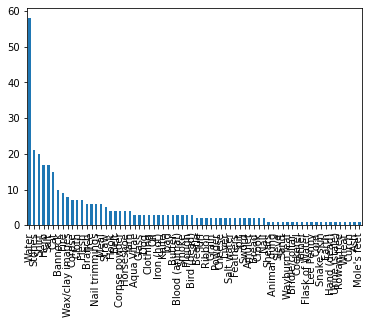

In [42]:
om['RitualObject_Type'].value_counts().plot(kind='bar')
from pylab import rcParams
rcParams['figure.figsize'] = 10,15

By far, as seen above, "water" is the trend, being the most common Ritual Object, having been used 58 times throughout all of the cases.
The second popular is a group of clusters, having similar values to each other: "stones", "shirt","Salt", "Herb" having been used 18 times each on average.
The least common Ritual Objects and the outliers are some strange ones such as "Urine", "Hand dead", "Ash",etc which have only been used once each, throughout all cases.

## What are the most common and uncommon Religious Motifs?
Plotting Religious Motifs to see occurencies of each, changed color to green

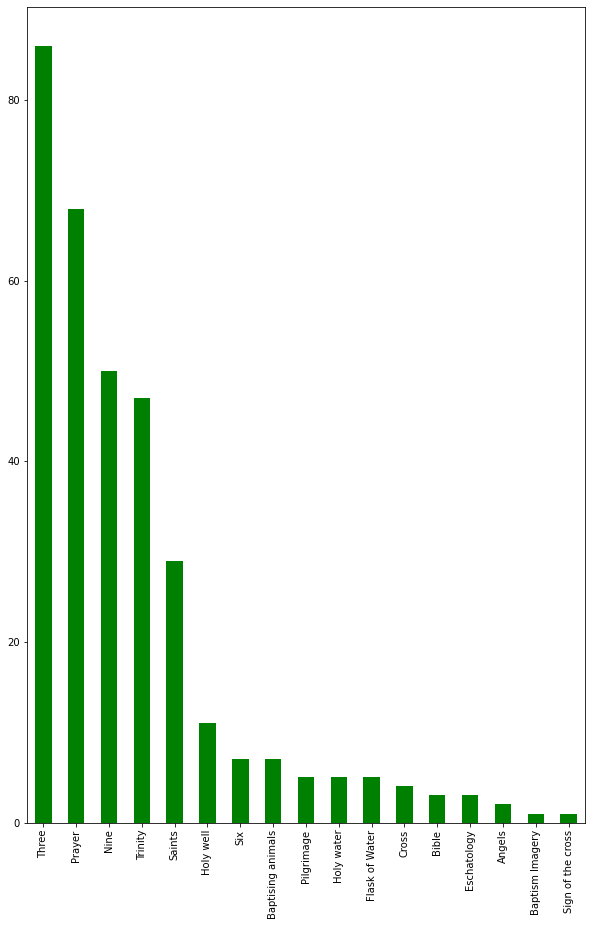

In [43]:
om['Motif_Type'].value_counts().plot(color='green', kind='bar')

 As shown in the plot, the most common Religious Motif and the trend is "Three", used 86 times throughout all the Cases.
The second popular one is "Prayer", used 68 times, followed by "Nine", 50, and "Trinity", used 47 times.
The outliers, least used Religious Motifs are "Baptism Imagery" and "Sign of the cross", "Angels", "Bible", only used around 1-2 times throughout all Cases.

## How many Religious Motifs have been attributed to each Case?
As observed above, some cases have multiple Religious Motifs or/and Ritual Obj attributed to them.
This pie chart below shows the amount of Religious Motifs attributed to Cases by percentage.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dad195c50>],
      dtype=object)

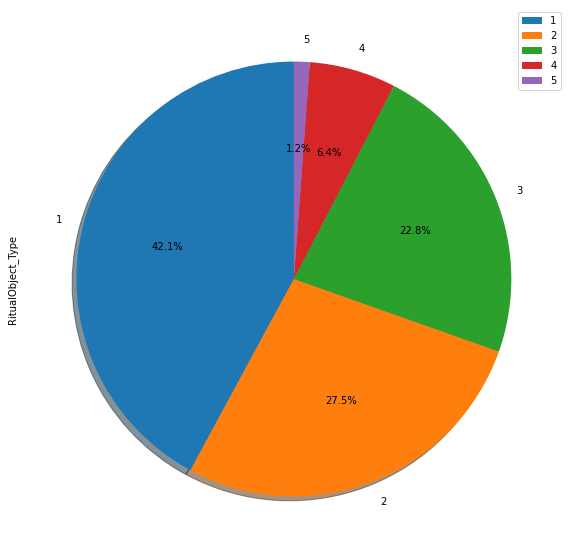

In [44]:
df4.groupby(['Motif_Type']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

As seen above, there are between 1 to 5 Religious Motifs attributed to each Case.
Coincidentally, the results are in ascending order:
The most common number of Religious Motifs attributed to Ritual Objects is 1 per Case, marking 42.1% of all Religious Motifs, this being the trend of the dataset.
The second most common number of Religious Motifs attributed to Ritual Objects is a total of 2 per Case, marking 27.5% of all Religious Motifs.
The least common number of Religious Motifs attributed to Ritual Objects is a total of 5 per Case, 1.2% of all Religious Motifs, this being the outlier.

## How many Ritual Objects have been attributed to each Case? 
As understood from the data above, there can be multiple Ritual Objects attributed to each Case.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dad46b250>],
      dtype=object)

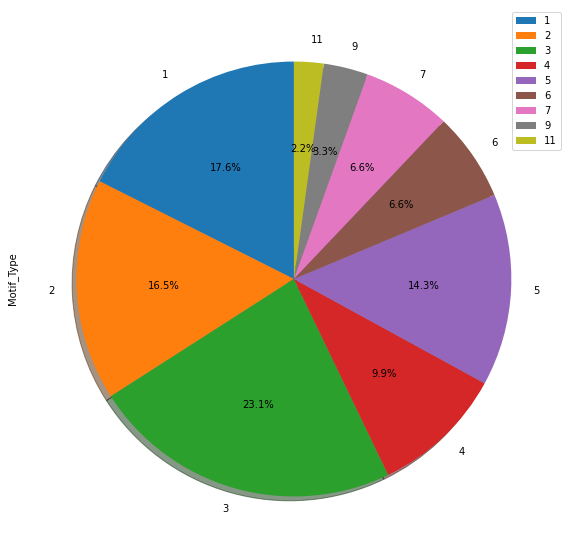

In [45]:
df4.groupby(['RitualObject_Type']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

The piechart above shows that there are between 1 to 11 Ritual Objects attributed per Case.
The trend is around 3 Ritual Objects attributed to each Case, 23.1%.
The clustered values are 1,2,5 Ritual Objects per Case, having a percentage between 14.3% to 17.6%.
The outliers are 11 and 9 objects attributed to only one Case each.

## Plotting the relationship between the numbers of Ritual Objects and Religious Motifs attributed to each Case:

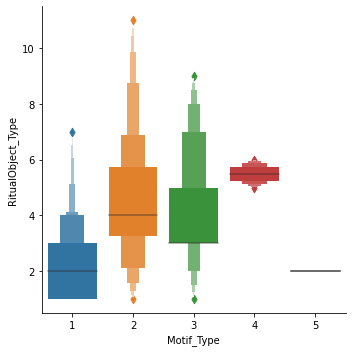

In [46]:
sns.catplot(x="Motif_Type", y="RitualObject_Type", kind="boxen",
            data=df4.sort_values("Motif_Type"))

 On average, as the number of Religious Motifs used per case increases, so does the number of Ritual Objects:
1 Religious Motif is normally attributed to 2 Ritual Objects on average.
2 Religious Motifs are attributed to an average of 4 Ritual Objects per case. 
Although, interestingly, 3 Religious Motifs are attributed to a varied number of Ritual Objects, between 3 to 5 to even 7 and 9, forming the outliers of our dataset.
4 Religious Motifs are attributed to a mean of 5 Ritual Objects per case.
We can clearly see the outlier of 5 Religious Motifs attribited to 2 Ritual Objects for only one Case.
Overall, the numbers of Ritual Objects and Religious Motifs attributed to each Case are varied, although there seem to be connections such as the amount of Ritual Objects and Religious Motifs attributed per Case seem to be almost equal on average, eg: 1 Rel Motif has 2 Rit Obj on average per case, 2 Rel Motifs have an average of 4 Rit Obj per case,
Therefore, the higher the number of Rel Motifs used per Case, the higher is the number of Ritual Obj too, on average.

## Creating network visualisations to understand the relationship between Ritual Objects and Religious Motifs

In [47]:
import networkx as nx

In [48]:
graph = nx.from_pandas_edgelist(om,source="RitualObject_Type",target="Motif_Type")

In [49]:
nx.info(graph)
# There are 86 nodes and 205 edges. Nodes are the centre points of creating connections.

'Name: \nType: Graph\nNumber of nodes: 86\nNumber of edges: 205\nAverage degree:   4.7674'

## Plotting the relationship between Ritual Objects and Religious Motifs

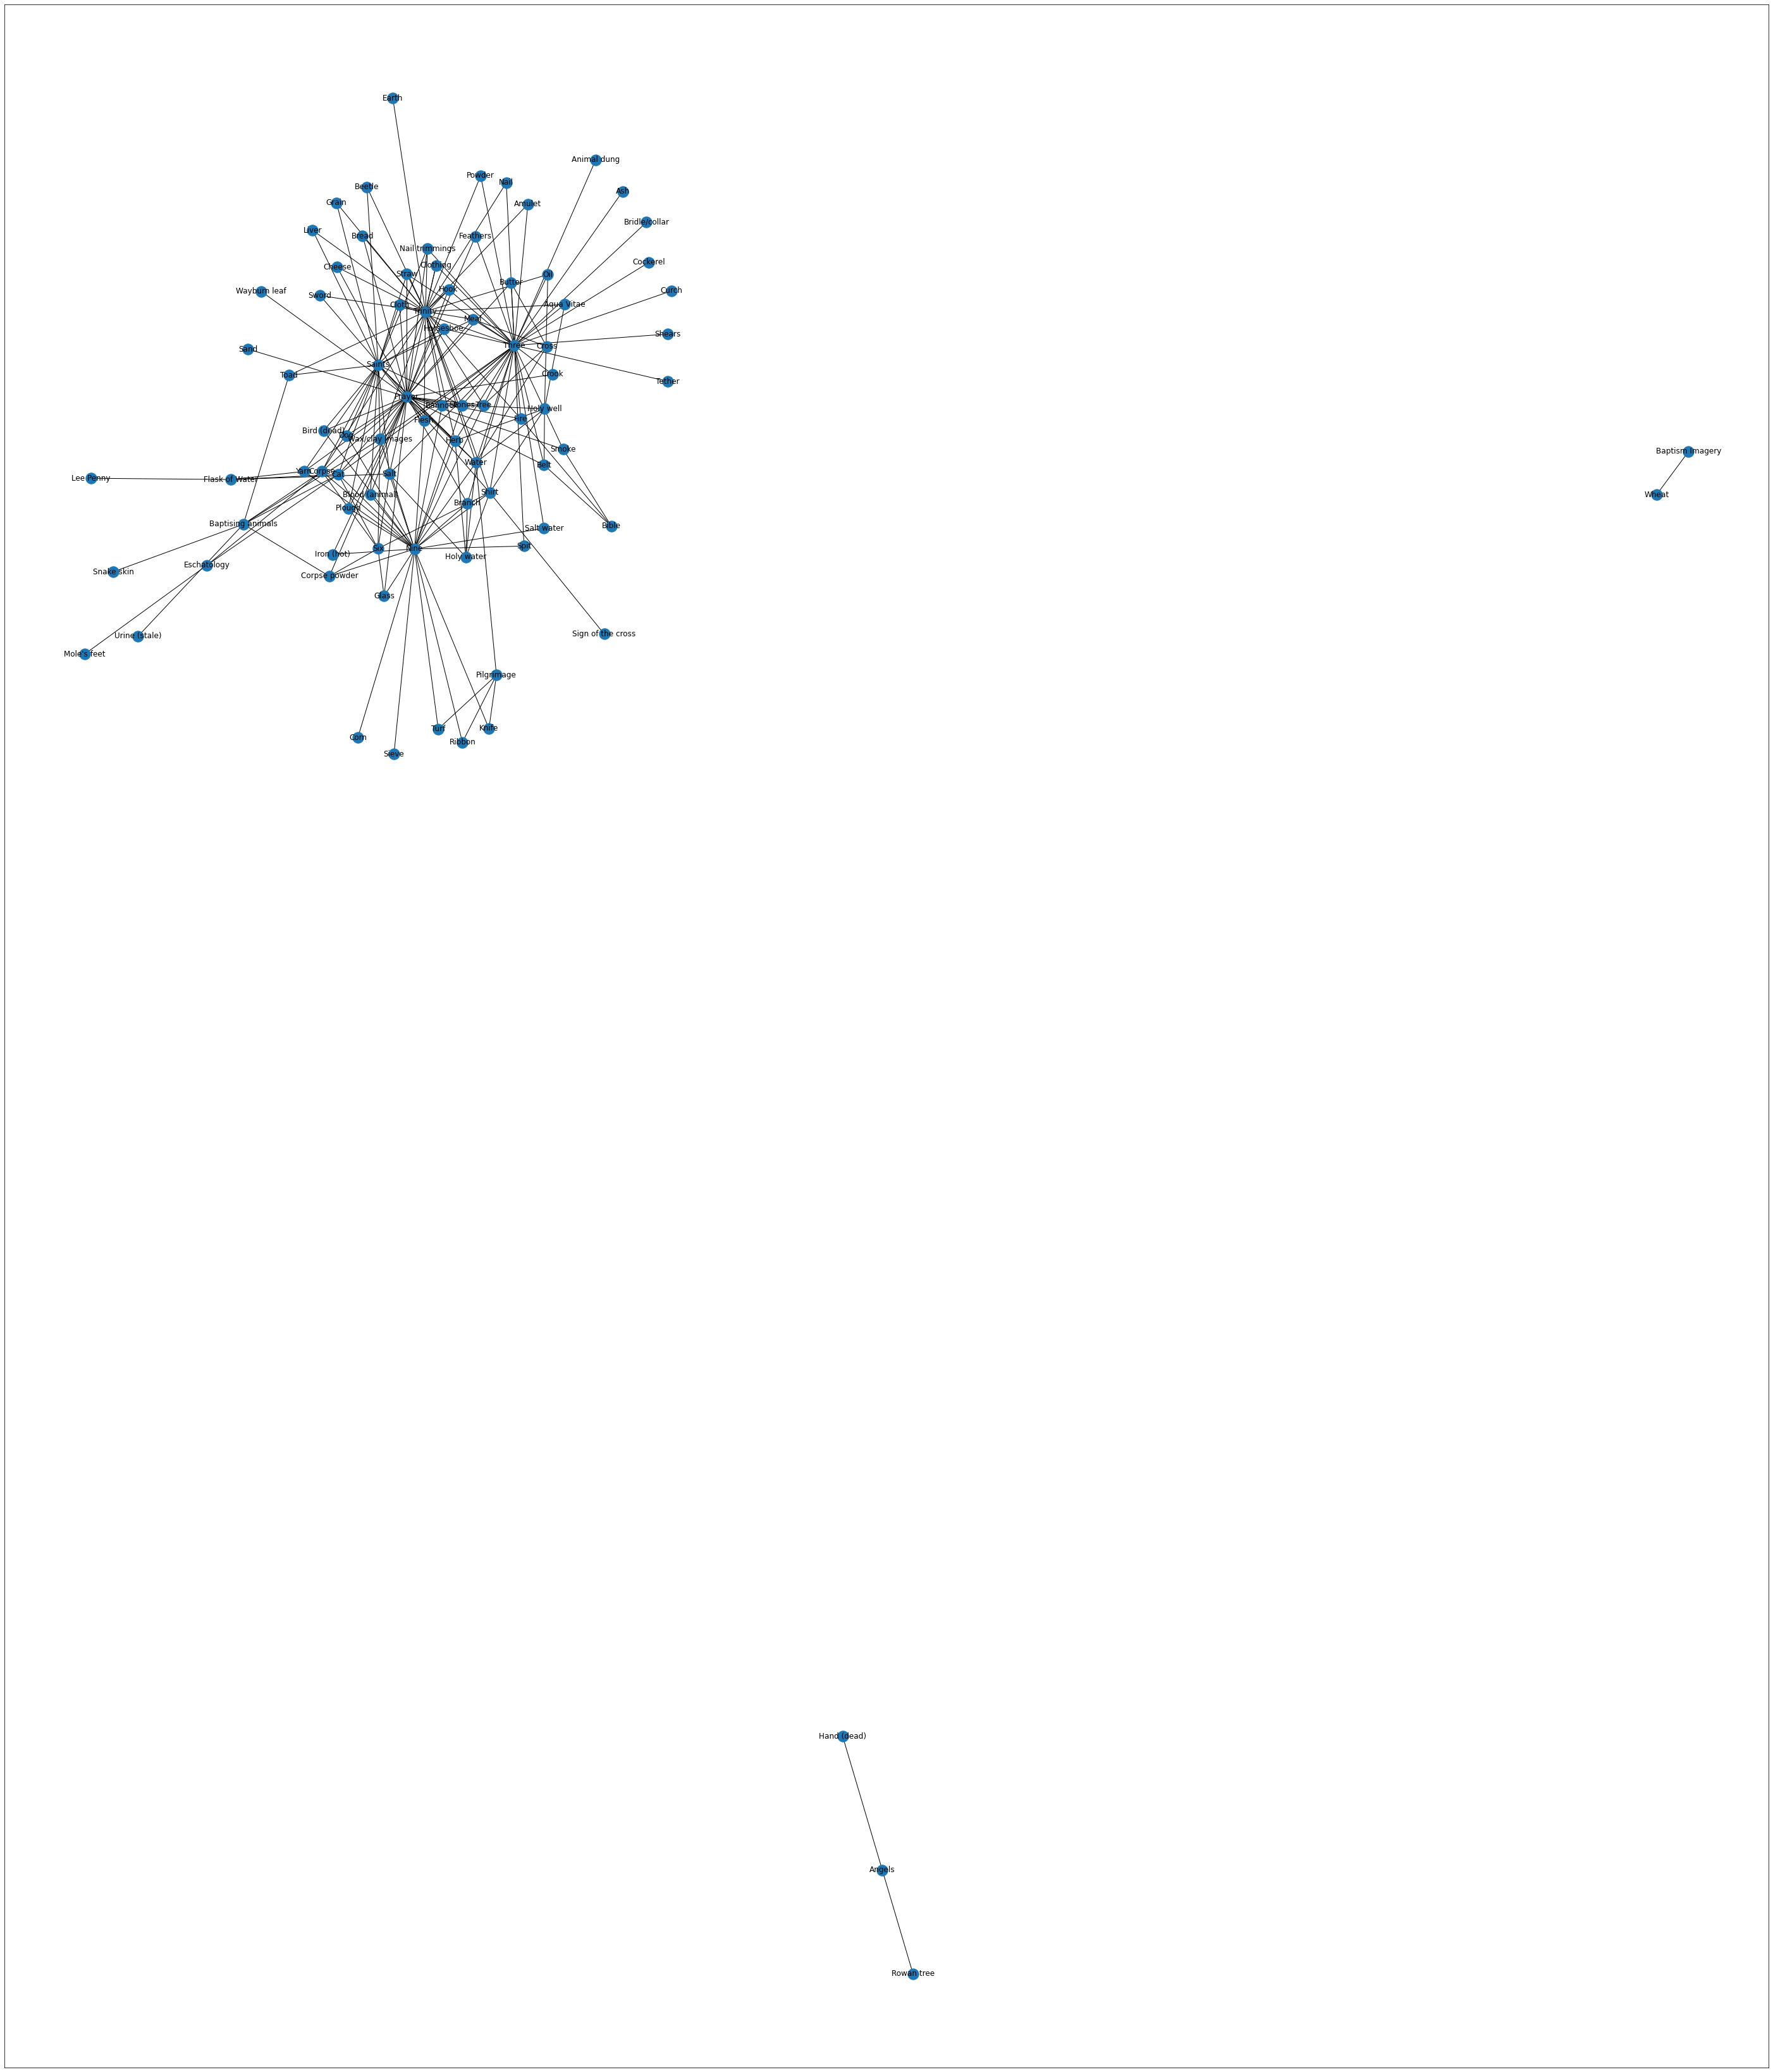

In [50]:
plt.figure(figsize=(50,60))
nx.draw_networkx(graph)

 From the visualisation, we notice right away the two groups that have been separated from the rest, being the outliers of our dataset:
The Religious Motif "Angels" has been attributed to 2 Ritual Objects: "Rowan Tree" and "Hand (dead)". 
Speculations could be made regarding the use of these objects such as: someone's death by a tree and the apparition of spiritual creatures such as angels in the process.
The second outlier which has "Baptism Imagery" as the Religious Motif has been attributed to the Ritual Obj "Wheat", which  seems completely irrelevant and will not be taken into account.
Some associations seem to be quite random at first glance, but others seem very related. For example, the Religious Motif "Baptising animals" is often associated with Ritual Objects that make a lot of sense as a pair: "snake skin", "corpse", "toad", "urine", "Cat"
Similarly, the motif "Holy well" is attributed to the ritual obj "Aqua Vitae"
Ritual Object "Water" is very well connected to "Holy well" Motif , "Piligrimage", which makes total sense as one needs water supply during such a trip.
Ritual Object "Tree" is connected to "Stones", natural elements and Motifs such as "Prayer" amd "Saints", which can also be relevant, connected to the idea of praying by a tree.

In [51]:
# Saving the visualisation as a graph on my pc
plt.savefig("Graph.png", format="PNG")

<Figure size 720x1080 with 0 Axes>

In [52]:
# most popular motifs/objects that create the most connections
most_popular = nx.degree_centrality(graph)
for w in sorted(most_popular, key=most_popular.get, reverse=True):
    print(w, most_popular[w])

Prayer 0.44705882352941173
Three 0.44705882352941173
Trinity 0.3529411764705882
Nine 0.3176470588235294
Saints 0.27058823529411763
Water 0.10588235294117647
Cat 0.09411764705882353
Shirt 0.09411764705882353
Herb 0.08235294117647059
Salt 0.08235294117647059
Wax/clay images 0.08235294117647059
Holy well 0.08235294117647059
Corpse 0.08235294117647059
Six 0.08235294117647059
Baptising animals 0.08235294117647059
Stones 0.07058823529411765
Flask of Water 0.07058823529411765
Tree 0.058823529411764705
Meal 0.058823529411764705
Holy water 0.058823529411764705
Flesh 0.058823529411764705
Cloth 0.047058823529411764
Fire 0.047058823529411764
Yarn 0.047058823529411764
Pilgrimage 0.047058823529411764
Cross 0.047058823529411764
Straw 0.047058823529411764
Bannock 0.047058823529411764
Nail trimmings 0.047058823529411764
Branch 0.047058823529411764
Corpse powder 0.047058823529411764
Belt 0.047058823529411764
Horseshoe 0.047058823529411764
Hook 0.047058823529411764
Bird (dead) 0.03529411764705882
Blood (

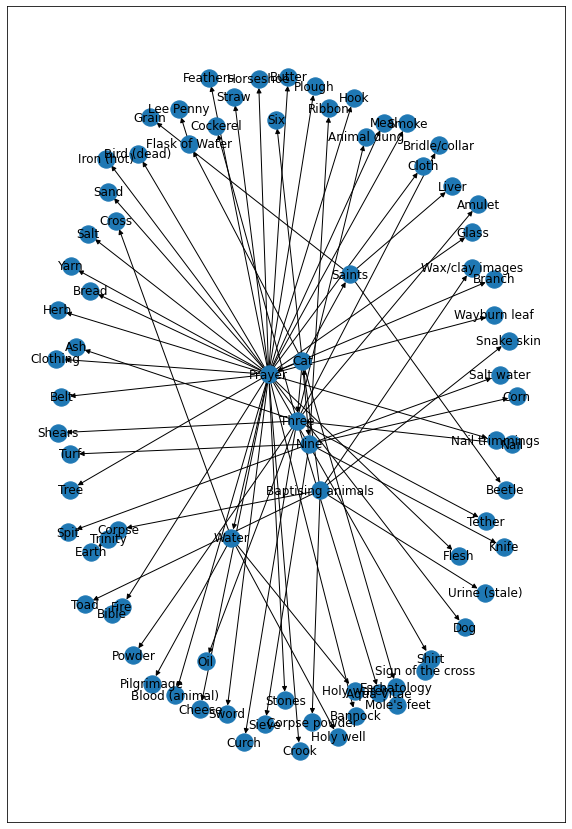

In [53]:
# As noticed before, Baptising animals  religious motif is often associated to very relevant Ritual Objects such as "snake skin", "Urine (stale)", "Toad", "Corpse" etc.
group1 = nx.bfs_tree(graph,"Baptising animals")
nx.draw_networkx(group1)

In [54]:
print("'Baptising animals'motif is connected to the following Ritual Obj:", graph['Baptising animals'])

'Baptising animals'motif is connected to the following Ritual Obj: {'Cat': {}, 'Corpse': {}, 'Corpse powder': {}, 'Wax/clay images': {}, 'Snake skin': {}, 'Urine (stale)': {}, 'Toad': {}}


In [55]:
arrayb = ['Baptising animals']
om.loc[objects_motifs['Motif_Type'].isin(arrayb)]
# This proves that the motif "Baptising animals" is only present in one unique Case C/EGD/110 which has very relevant ritual obj attributed to it: snake skin, toad, cat, etc.

,CaseRef,RitualObject_Type,Motif_Type
198,C/EGD/110,Cat,Baptising animals
199,C/EGD/110,Corpse,Baptising animals
200,C/EGD/110,Corpse powder,Baptising animals
201,C/EGD/110,Wax/clay images,Baptising animals
202,C/EGD/110,Snake skin,Baptising animals
203,C/EGD/110,Urine (stale),Baptising animals
204,C/EGD/110,Toad,Baptising animals


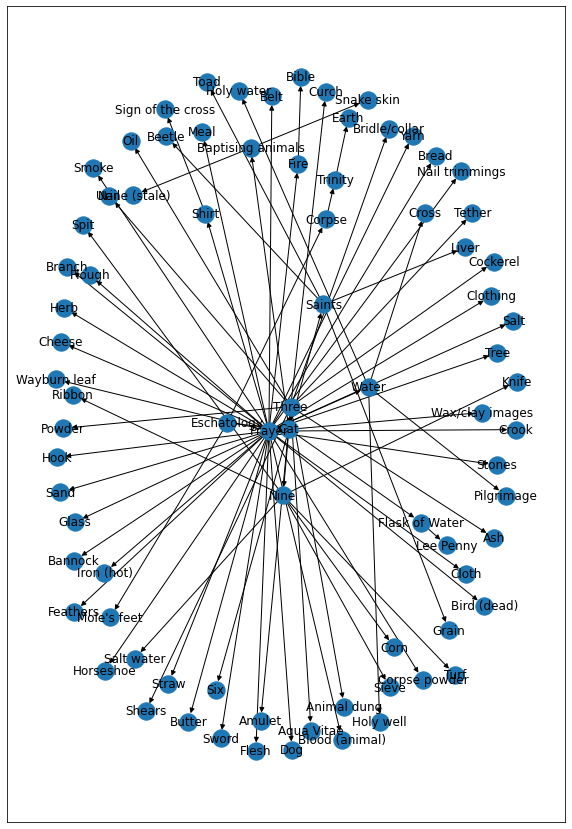

In [56]:
group2 = nx.bfs_tree(graph,"Eschatology")
nx.draw_networkx(group2)

In [57]:
print("'Eschatology' motif is connected to the following Ritual Obj:", graph['Eschatology'])
# Since the term Eschatology means death, this is a very coherent association.

'Eschatology' motif is connected to the following Ritual Obj: {'Cat': {}, 'Corpse': {}, "Mole's feet": {}}


In [58]:
# Finding out the CaseRef that links the Motif "Eschatology" with the 3 Ritual objects: cat, corpse, mole's feet:
array2 = ['Eschatology']
om.loc[objects_motifs['Motif_Type'].isin(array2)]
# Therefore, CASE E/EGD/59 links the motif "Eschatology" with the 3 very pertinent Ritual Objects: mole's feet and corpse (symbols of death) and cat, which could have also been connected to death.

,CaseRef,RitualObject_Type,Motif_Type
172,C/EGD/59,Cat,Eschatology
173,C/EGD/59,Corpse,Eschatology
174,C/EGD/59,Mole's feet,Eschatology


In [59]:
print("'Holy well' motif is connected to the following Ritual Obj:", graph['Holy well'])
# Holy well Motif has some great and relevant associations: Aqua Vita, Herb, Stones, natural objects.

'Holy well' motif is connected to the following Ritual Obj: {'Water': {}, 'Stones': {}, 'Herb': {}, 'Oil': {}, 'Aqua Vitae': {}, 'Belt': {}, 'Shirt': {}}


In [60]:
# seeing what cases are attributed to the motif "Holy well"
arrayc = ['Holy well']
om.loc[objects_motifs['Motif_Type'].isin(arrayc)]

,CaseRef,RitualObject_Type,Motif_Type
117,C/JO/2882,Water,Holy well
251,C/EGD/2256,Stones,Holy well
254,C/EGD/2256,Water,Holy well
257,C/EGD/2256,Herb,Holy well
260,C/EGD/2256,Oil,Holy well
263,C/EGD/2256,Aqua Vitae,Holy well
275,C/EGD/317,Water,Holy well
276,C/EGD/317,Belt,Holy well
303,C/EGD/28,Shirt,Holy well
306,C/EGD/28,Herb,Holy well


In [61]:
print("'Sign of the cross' motif is connected to the following Ritual Obj:", graph['Sign of the cross'])
# Sign of the cross Rel Motif only has one association: Shirt, although it could be relevant if the person had a cross sign on the shirt or was wearing a cross..

'Sign of the cross' motif is connected to the following Ritual Obj: {'Shirt': {}}


In [62]:
# finding out the Case connected to Shirt and Sign of the cross
array3 = ['Sign of the cross']
om.loc[objects_motifs['Motif_Type'].isin(array3)]

,CaseRef,RitualObject_Type,Motif_Type
225,C/EGD/882,Shirt,Sign of the cross


# Reflect and Hypothesise

1. What do you think may be behind the relationships and distributions you have found?

First of all, I analysed the two datasets separately, figuring out the most common trends in both Ritual Objects and Religious Motifs. There is a total of 128 unique Ritual Objects and only 17 unique Religious Motifs. I merged the two datasets together, sorting the two columns by the Case Ref and figured out that there are only 53 matches in Cases. 
I then also noticed that each case can have multiple Ritual Objects or Religious Motifs attributed to them, fact which made the analysis more complex. 

Some association seem to be quite random at first glance, but others seem very related. For example, the Religious Motif "Baptising animals" is  associated with animalistic Ritual Objects that make a lot of sense as a group: "snake skin", "corpse", "toad", "urine", "cat" and together they construct the unique Case C/EGD/110. This is the only Case that has “Baptising animals” motif which makes it very interesting.  Similarly, the unique motif “Eschatology”, which means death, has Ritual Objects attributed to it that are either associated with the deceased, such as “corpse”, “mole’s feet” or living beings such as “cat”, all of them belonging to Case E/EGD/59.

Moreover, “Sign of the Cross” motif which also has one single association is connected to the Ritual Object “shirt”, making the plausible deduction that there could have been a “Sign on the Cross” visible on a shirt associated with Case number C/EGD/882.

Cases containing the Religious Motif “Holy well” are also interesting to look at because they seem to have relationships with Ritual Objects that are also very relevant, such as : Water, Stones, Herb.
Also, Case C/EGD/160 containing the unique Ritual Object “Flask of Water” is correctly associated with a motif with the same name.

2. How does your data relate to the world?

These findings will be especially interesting for the historians who have put together the Scottish Witchcraft Survey Dataset, as it will open new doors of knowledge that show deep connections between separate datasets that at first glance seemed unrelated to each other.

3. What hypothesis came up as you were exploring the data and how would you go about testing them?

I explained more about my hypothesis above, but I truly believe that if we were to look even deeper, we would find even more meaningful connections. The data is richer than it seems at first glance. 
The next step within my group is to connect our analysis in order to answer a more complex question: “The Ritual Objects used by Accused Witches’ in relationship with Religious Motifs and the Witches’ Meeting place. 
The initial plan is to create a complex Network showing all the relationships using a different colour for each group: Accused Witches (red), Ritual Obj (blue), Religious Motifs (yellow), Meeting Place ( green), and from this to build an interactive board game.

In [63]:
ro_usedonce1 = om[om.groupby('RitualObject_Type').RitualObject_Type.transform(len) == 1]
print(ro_usedonce1)

        CaseRef RitualObject_Type         Motif_Type
0    C/EGD/2231      Wayburn leaf             Prayer
41   C/EGD/2174          Cockerel              Three
67    C/JO/3059        Rowan tree             Angels
68    C/JO/3059       Hand (dead)             Angels
100  C/EGD/2148              Sand             Prayer
102  C/EGD/1770            Tether              Three
104  C/EGD/1770       Animal dung              Three
108   C/JO/3093            Shears              Three
114   C/JO/3248             Curch              Three
115  C/EGD/2158     Bridle/collar              Three
121   C/EGD/160         Lee Penny     Flask of Water
122   C/EGD/160    Flask of Water     Flask of Water
174    C/EGD/59       Mole's feet        Eschatology
202   C/EGD/110        Snake skin  Baptising animals
203   C/EGD/110     Urine (stale)  Baptising animals
220  C/EGD/1284             Sieve               Nine
243  C/EGD/2210             Earth            Trinity
246  C/EGD/2234              Corn             

In [66]:
om.to_csv (r'C:\This PC\Desktop\Design inFO\export_dataframe.csv', index = False, header=True)
print(om)

        CaseRef RitualObject_Type       Motif_Type
0    C/EGD/2231      Wayburn leaf           Prayer
1    C/EGD/1309              Tree            Three
2    C/EGD/1855             Water           Prayer
3    C/EGD/2150             Cloth           Prayer
4    C/EGD/2150             Cloth            Three
..          ...               ...              ...
329  C/EGD/1558             Liver           Saints
330  C/EGD/1558             Cloth          Trinity
331  C/EGD/1558             Cloth           Saints
332   C/EGD/170             Wheat  Baptism Imagery
333   C/EGD/147               Cat             Nine

[334 rows x 3 columns]


In [44]:
om.CaseRef.nunique()

53

In [41]:
d = ritual_objects.groupby('RitualObject_Type').size()

<bound method NDFrame.head of RitualObject_Type
Ale            1
Almond         1
Amulet         1
Animal dung    1
Aqua Vitae     3
              ..
Wheat          4
Wine           1
Wood           1
Wort           1
Yarn           5
Length: 128, dtype: int64>